In [77]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import math

In [81]:
number_of_friends = []
for x in range(200):
    number_of_friends.append(random.randint(1,25))
# add out liers
to_append = [40,39,40, 100]
for value in to_append:
    number_of_friends.append(value)

In [82]:
friends_count = Counter(number_of_friends)

In [83]:
xs = range(101)
ys = [friends_count[x] for x in xs]

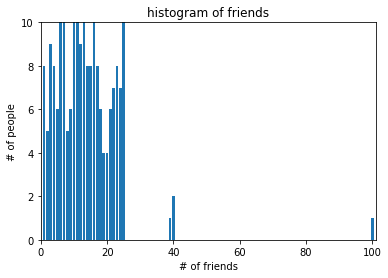

In [84]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 10])
plt.title('histogram of friends')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [85]:
num_points = len(number_of_friends)
print(num_points)

204


In [86]:
largest_value = max(number_of_friends)
smallest_value = min(number_of_friends)
print(largest_value)
print(smallest_value)

100
1


In [88]:
sorted_values = sorted(number_of_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

1
1
40


In [89]:
def mean(x):
    return sum(x)/len(x)

In [90]:
mean(number_of_friends)

13.686274509803921

In [91]:
def median(v):
    """find the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n%2==0:
        # if even return the average of the "middle" two
        return (sorted_v[midpoint] + sorted_v[midpoint+1])/2
    else:
        # if odd return the middle value
        return sorted_v[midpoint]

In [92]:
median(number_of_friends)

13.0

In [93]:
def quantile(x, p):
    """returns the pth-percentil value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [94]:
print(quantile(number_of_friends, .30))
print(quantile(number_of_friends, 0.10))

8
3


In [95]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

In [96]:
print(mode(number_of_friends))

[25]


In [97]:
def data_range(x):
    return max(x) - min(x)

In [98]:
data_range(number_of_friends)

99

In [99]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [100]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [101]:
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [102]:
variance(number_of_friends)

97.66463826910076

In [103]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [104]:
standard_deviation(number_of_friends)

9.882542095488425

In [105]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [106]:
interquartile_range(number_of_friends)

12

In [108]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [188]:
daily_minutes = []
for value in number_of_friends:
    daily_minutes.append(value/1000*random.randint(50,100)*10)

In [189]:
covariance(number_of_friends, daily_minutes)

68.5225016903313

In [190]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y)/stdev_x/stdev_y
    else:
        return 0 

In [191]:
correlation(number_of_friends, daily_minutes)

0.9327593101857268

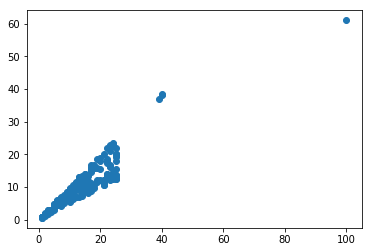

In [193]:
plt.scatter(number_of_friends, daily_minutes)